In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/bipulshahi/Dataset/main/Advertising.csv', index_col = 0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


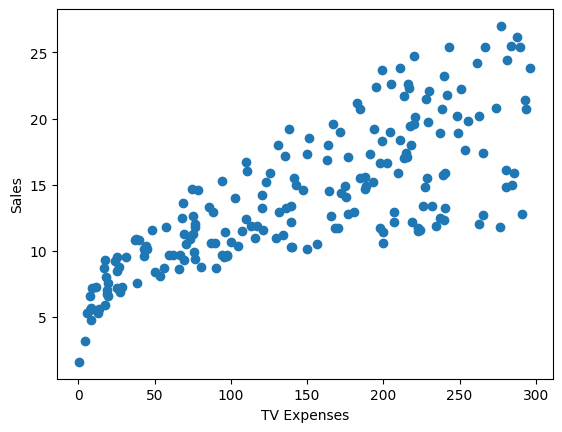

In [57]:
X = df['TV']
y = df['sales']

plt.scatter(X,y)
plt.xlabel('TV Expenses')
plt.ylabel('Sales')
plt.show()

In [58]:
#Yh = w0 + w1 * X

w1 = (((X - X.mean()) * (y - y.mean())).sum())/((X - X.mean())**2).sum()

w0 = y.mean() - w1 * X.mean()

print(w1, w0)

0.047536640433019736 7.0325935491276965


In [59]:
Yh = w0 + w1 * X

print(Yh)

1      17.970775
2       9.147974
3       7.850224
4      14.234395
5      15.627218
         ...    
196     8.848493
197    11.510545
198    15.446579
199    20.513985
200    18.065848
Name: TV, Length: 200, dtype: float64


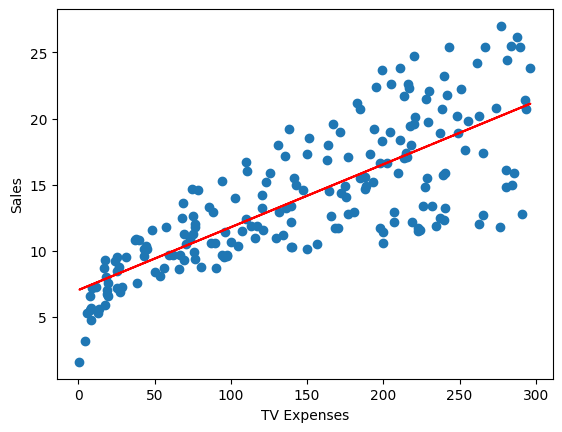

In [60]:
plt.scatter(X,y)

plt.plot(X,Yh, c='r')

plt.xlabel('TV Expenses')
plt.ylabel('Sales')
plt.show()

In [61]:
error = abs(y - Yh).mean()       #real_sales - calculated_sales
error

2.549806038927486

In [62]:
tv_new = 50
sales_new = w0 + w1 * tv_new

print(sales_new)

9.409425570778684


**Using Scikit-learn for Simple linear Regression**

In [63]:

from sklearn.model_selection import train_test_split      #to perform data splitting
from sklearn.linear_model import LinearRegression         #to perform linear regression


X = df[['TV']]                          #features
y = df[['sales']]                         #target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
model = LinearRegression()


model.fit(X_train, y_train)                #model training

LinearRegression()

In [64]:
print(model.coef_)
print(model.intercept_)

[[0.04600779]]
[7.29249377]


**evaluating performance metrics**

In [65]:
y_trainPred = model.predict(X_train)
y_testPred = model.predict(X_test)

maeTrain = abs(y_train - y_trainPred).mean()
maeTest = abs(y_test - y_testPred).mean()

print("Mean absolute Error on Train Data" , maeTrain)
print("Mean absolute Error on Test Data" , maeTest)

Mean absolute Error on Train Data sales    2.578671
dtype: float64
Mean absolute Error on Test Data sales    2.505418
dtype: float64


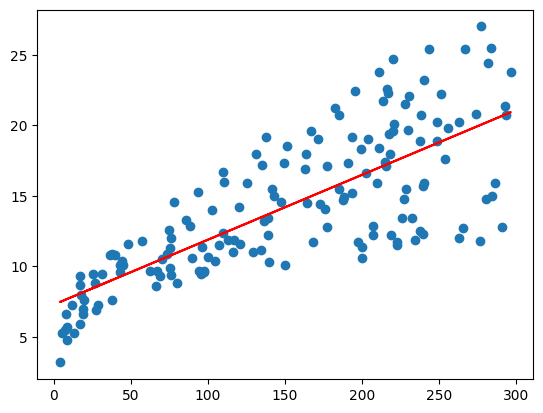

In [66]:
plt.scatter(X_train, y_train)

plt.plot(X_train, y_trainPred, c='r')

plt.show()

**Prediction**

In [67]:
tv_new = 45

sales_new = model.predict([[tv_new]])

print("Sales prediction using model_" , sales_new)

Sales prediction using model_ [[9.36284431]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
